In [1]:
# Linear Regression: House Price Predictions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
boston_df = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Boston.csv")

In [4]:
boston_df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Attribute Information

In [5]:
# CRIM: per capita crime rate by town
# ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
# INDUS: proportion of non-retail business acres per town
# CHAS: Charles river dummy variables (=1 if tract bound river; 0 otherwise)
# NOX: nitric oxides concentration (parts per 10 million)
# RM: average number of rooms per dwelling
# AGE: proportion of owner-occupied units built prior to 1940
# DIS: weighted distances to five Boston employment centres
# RAD: index of accessibility to radial highways
# TAX: full-value property tax rate per dollar 10,000
# PTRARIO: pupil-teacher raion by town
# B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks per town
# LSTAT: % lower status of population
# MDEV: median value of owner-occupied homes in $1000's

#### Data Manipulation

In [6]:
boston_df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [7]:
boston_df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
boston_df.drop('Unnamed: 0', axis=1, inplace = True)

#### Data Visualisation

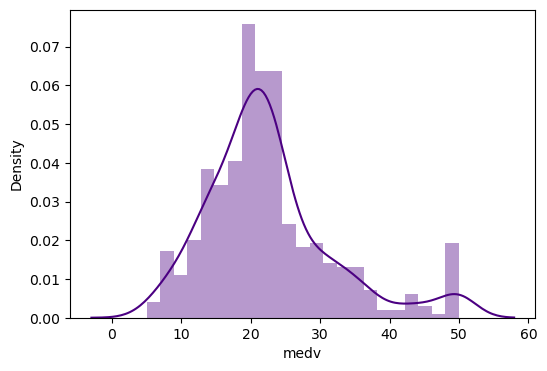

In [9]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(6,4))
sns.distplot(boston_df['medv'], color = 'indigo')
plt.show()

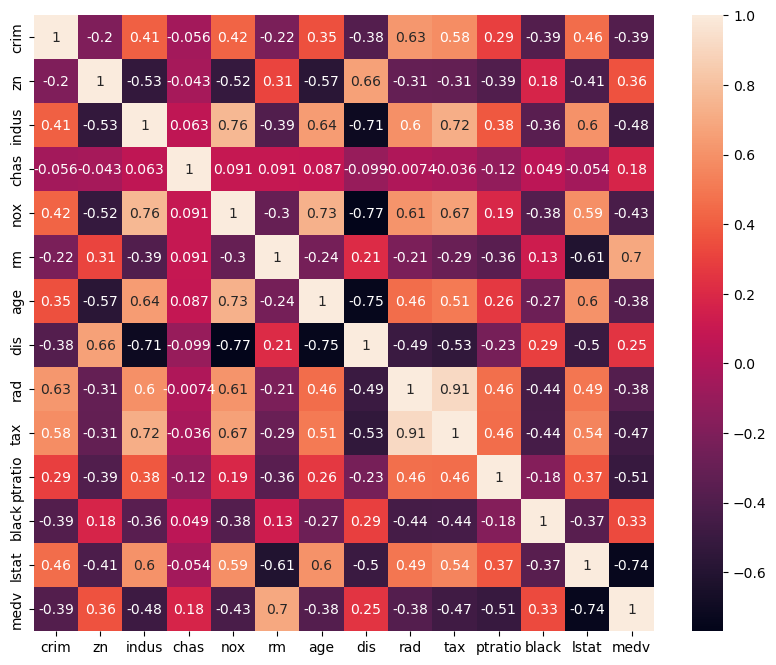

In [10]:
# Heatmap is used to find multicolinerity
# Strong correlation: > 0.8
# Weak correlation: < 0.8

plt.figure(figsize=(10,8))
sns.heatmap(boston_df.corr(), annot=True)
plt.show()

#### Feature Selection

In [11]:
# Among features the relation should be weak i.e., <0.8
# Between feature and target the relation should be higher.

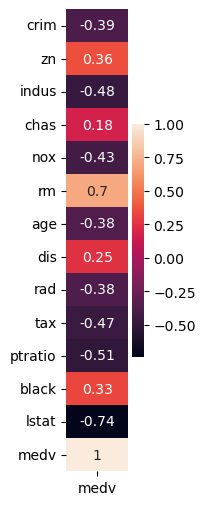

In [12]:
# Target: medv
plt.figure(figsize=(1,6))
sns.heatmap(boston_df.corr()[['medv']], annot=True)
plt.show()

#### Define Features and Target

In [13]:
X = boston_df.drop(['medv','rad','chas'],axis=1)
Y = boston_df['medv']

In [14]:
X

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48


In [15]:
# The data is not-uniform, there is a need of normalization

In [16]:
# Normalising features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)

MinMaxScaler()

In [17]:
scaler.transform(X)

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [18]:
X_scaled = scaler.transform(X)

In [19]:
X_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

#### Cross Validation: Splitting into Train and Test

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y,test_size = 0.2, random_state=3)

# random_state shuffles the data as 80% data goes into training the model and remaining 20% gets reserved for testing
# Randomization to select 80% data for training is done using random_state. This can be any number btw 0 to 11 (in general)
# One random_state number will be there for that accuracy will be very high
# random_state = A numerical value which is used to fix randomization

#### Liner Regression

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [22]:
lin_reg.fit(x_train,y_train) # To train my model we have 'fit' function

LinearRegression()

In [23]:
lin_reg.score(x_test,y_test)
# To test my model, 'score' returns you R-squared value

0.791176229496048

#### Regression Metrics

In [24]:
# Predictions
yhat = lin_reg.predict(x_test)

In [25]:
# r2-score, mean squared error, mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
# r-2 is a coefficient of determination
# r-2 = 1 - RSS / TSS
# RSS (Sum of residual squared) = Variance b/w y_actual (y) and y_predicted (yhat)
# TSS (Total sum squared) = Variance b/w y_actual (y) and it's mean = y_actual - mean
r2_score(y_test,yhat)
# After dropping chas column, R-square value increases from 0.78 to 0.79

0.791176229496048

In [27]:
# MAE
mean_absolute_error(y_test,yhat)

3.088869510376245

In [28]:
# MSE
mean_squared_error(y_test,yhat)

17.281169981502295

In [29]:
# RMSE: Root mean squared error
np.sqrt(mean_squared_error(y_test,yhat)) #Actual value vs predicted value

4.157062662686514